## Performance log

log | description | parameters | loss (tran/valid/test) | accuracy (train/valid/test)
-|-|-|-|-
 - | Null input | - | 3.438 3.422 3.413 | 15.7% 15.8% 16.1%
 - | Simple NN, one-hot encoding | - | 2.573 2.543 2.549 | 23.9% 23.8% 24.3%
 - | Simple NN, embedding (10) | - | 2.579 2.549 2.554 | 23.9% 23.9% 24.2%
 - | Simple NN, embedding (20) | - | 2.569 2.539 2.545 | 23.9% 23.8% 24.3%
 - | Simple NN, embedding (50) | - | 2.571 2.541 2.548 | 24.0% 23.9% 24.4%
 - | Simple NN, embedding (100) | - | 2.571 2.542 2.548 | 23.9% 23.8% 24.3%
run__2021-03-02__20-05-51 | Simple_RNN_with_Encoding | - | 1.996 1.926 2.013 | 43.7% 45.4% 42.2%
run__2021-03-02__22-00-45 | Simple_RNN_with_Embedding (20) | - | 1.977 1.901 1.992 | 44.2% 45.7% 43.2%
run__2021-03-03__06-34-16 | Simple_RNN_with_Embedding (50) | - | 2.048 1.980 2.060 | 42.0% 43.3% 41.0%
run__2021-03-03__10-27-30 | GRU_with_Encoding | - | 1.691 1.616 1.718 | 51.3% 53.1% 50.2%
run__2021-03-03__12-56-16 | LSTM_with_Encoding | - | 2.046 1.988 2.054 | 41.9% 43.5% 40.5%
run__2021-03-03__16-57-04 | GRU_with_Embedding (20) | - | 1.763 1.684 1.785 | 49.2% 51.1% 47.9%
run__2021-03-03__18-36-42 | LSTM_with_Embedding (20) | - | 2.114 2.060 2.116 | 40.2% 41.8% 39.1%
run__2021-03-04__10-07-12 | Simple_RNN_Dense_output_with_Encoding (116 units) | 40600 | 1.3 1.223 1.326 | 61.5% 63.1% 60.4%
run__2021-03-04__13-03-01 | GRU_Dense_output_with_Encoding (116 units) | 95004 | 1.18 1.121 1.202 | 64.6% 66.0% 63.9%
run__2021-03-04__14-09-15 | LSTM_Dense_output_with_Encoding (116 units) | 121684 | 1.16 1.101 1.184 | 65.1% 66.6% 64.1%
run__2021-03-04__15-23-02 | Simple_RNN_Dense_output_with_Encoding (232 units) | 107996 | 1.25 1.182 1.273 | 63.0% 64.8% 62.0%
run__2021-03-04__17-02-59 | GRU_Dense_output_with_Encoding (232 units) | 270628 | 1.096 1.057 1.126 | 66.7% 67.7% 65.6%
run__2021-03-04__18-47-08 | LSTM_Dense_output_with_Encoding (232 units) | 350900 | 1.068 1.035 1.101 | 67.4% 68.2% 66.5%
run__2021-03-05__09-32-21 | Simple_RNN_stack_encoding_dense (3 layers, 232 units) | 323756 | 1.204 1.141 1.233 | 63.7% 65.3% 62.6%
run__2021-03-05__11-46-00 | GRU_stack_encoding_dense (3 layers, 232 units) | 919300 | 1.063 1.036 1.098 | 67.3% 68.0% 66.1%
run__2021-03-05__18-58-16 | LSTM_stack_encoding_dense (3 layers, 232 units) | 1213940 | 1.060 1.030 1.094 | 67.4% 68.1% 66.4%
run__2021-03-06__10-08-05 | GRU_LN_encoding_dense (3L,232u) | 920692 | 1.054 1.031 1.095 | 67.5% 68.4% 66.4%
run__2021-03-06__22-31-03 | GRU_LN_encoding_dense (3L,348u) | 1986500 | 1.035 1.020 1.077 | 68.1% 68.7% 66.9%
run__2021-03-07__11-26-06 | GRU_LN_encoding_dense (3L,464u,32x128) | 3455988 | 1.004 0.996 1.056 | 68.9% 69.2% 67.5%
run__2021-03-08__17-18-40 | GRU_LN_encoding_dense (3L,464u,128x32) - reached NaN | 3455988 | 1.048 1.005 1.078 | 68.2% 69.3% 67.3%
run__2021-03-11__19-14-45 | GRU_LN_encoding_dense (3L,464u,128x32,clipnorm=1) - reached NaN | 3455988 | 1.059 1.014 1.086 | 67.8% 68.9% 66.7%

## Import packages

In [2]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

import xml.etree.ElementTree as ET
from os import listdir, mkdir, getcwd
from os.path import join

import time
import json

## Split data
* DOWNLOAD FILE WITH keras.utils.get_file (if the file isn't yet in the directory)

In [3]:
# set the random seed for the train/valid/test/trash split
np.random.seed(20210228)

# access the unprocessed xml file
filepath = join('dataset', 'ECFR-title14.xml') # file already fetched from https://www.govinfo.gov/bulkdata/ECFR/title-14/ECFR-title14.xml
tree = ET.parse(filepath) # set up a xml tree by parsing the file
root = tree.getroot() # get a reference to the tree root

# create new files for each partition
train = open(join('dataset','ECFR-title14-train.txt'), 'w', encoding='utf-8')
valid = open(join('dataset','ECFR-title14-valid.txt'), 'w', encoding='utf-8')
test = open(join('dataset','ECFR-title14-test.txt'), 'w', encoding='utf-8')
trash = open(join('dataset', 'trash.txt'), 'w', encoding='utf-8')

# set up train/valid/test split scheme
partitions = np.array(['train', 'valid', 'test', 'trash'])
next_partition = partitions[0]
split_proportions = np.array([.98, .01, .01, 0]) # train, valid, test, trash

# iterate over each element of the xml tree
for element in root.iter():
    # stop when DoT part is reached
    if element.tag == 'DIV1':
        if element.attrib['N'] == '4':
            break 
        # if reached a new section
    if element.tag == 'DIV8':
        if next_partition == 'train':
            [train.write(line) for line in element.itertext() if line[0] != '\n']
        elif next_partition == 'valid':
            [valid.write(line) for line in element.itertext() if line[0] != '\n']
        elif next_partition == 'test':
            [test.write(line) for line in element.itertext() if line[0] != '\n']
        elif next_partition == 'trash':
            [trash.write(line) for line in element.itertext() if line[0] != '\n']
        next_partition = np.random.choice(partitions, p = split_proportions)

# close the newly created files
train.close()
valid.close()
test.close()
trash.close()

## Set up the datasets

In [44]:
# add some sort of shuffle

def make_dataset(partition, tokenizer, sequence_length = None, batch_size = 16, dummy = False, batching_mode = 'regular'):
    
    assert batching_mode in ['regular', 'recurrent_encoding', 'recurrent_embedding', 'stateful_encoding']

    # get dataset as list of sequences of tokens
    with open(join('dataset', 'ECFR-title14-' + partition + '.txt'), encoding='utf-8') as file:
        sequences = tokenizer.texts_to_sequences(file)
    
    # make single stream of tokens for the entire dataset
    dataset = [] 
    for paragraph in sequences:
        dataset += paragraph
    
    # get x and y from the full sequence
    dataset = np.array(dataset)
    y = tf.data.Dataset.from_tensor_slices(dataset[1:])
    
    # in case of a dummy dataset (x is all null)
    if dummy == True:  # empty inputs in order to test setup
        x = tf.data.Dataset.from_tensor_slices(np.zeros_like(dataset[:-1]))
    else:
        x = tf.data.Dataset.from_tensor_slices(dataset[:-1])
    
    # zip inputs and labels into tuples
    if batching_mode == 'regular': # dataset will not be batched into sequences (for simple NN)
        dataset = tf.data.Dataset.zip((x,y))
        dataset = dataset.batch(batch_size)
    elif batching_mode == 'recurrent_encoding': # will be batched in individual entries, then sequences, then batches
        dataset = tf.data.Dataset.zip((x,y))
        dataset = dataset.batch(1)
        dataset = dataset.batch(sequence_length, drop_remainder = True)
        dataset = dataset.batch(batch_size, drop_remainder = True)
    elif batching_mode == 'recurrent_embedding': # will be batched into sequences, then batches
        dataset = tf.data.Dataset.zip((x,y))
        dataset = dataset.batch(sequence_length, drop_remainder = True)
        dataset = dataset.batch(batch_size, drop_remainder = True)
    elif batching_mode == 'stateful_encoding': # will be batch so there is a stream of characters from a few longer sequences, compatible with stateful RNN
        
        partition_length = len(dataset)

        # batch_size = number of RNN instances, each seeing a piece from a different paragraph
        num_paragraphs = batch_size # different name for the same thing
        paragraph_length = partition_length // num_paragraphs # characters in each of the batch_size paragraphs
        # sequence_length = number of characters in a sequence = number of repetitions of the RNN stack per instance
        sequences_per_paragraph = paragraph_length // sequence_length # number of steps to finish paragraph = steps per epoch
        
        def map_fn(paragraph):
            return tf.data.Dataset.from_tensor_slices(paragraph).batch(sequence_length, drop_remainder=True)
        
        x = x.batch(1)
        x = x.batch(paragraph_length, drop_remainder = True)
        x = x.interleave(map_fn, cycle_length = num_paragraphs)
        x = x.batch(batch_size, drop_remainder = True)
        
        y = y.batch(1)
        y = y.batch(paragraph_length, drop_remainder = True)
        y = y.interleave(map_fn, cycle_length = num_paragraphs)
        y = y.batch(batch_size, drop_remainder = True)
        
        dataset = tf.data.Dataset.zip((x, y))
      
    dataset = dataset.prefetch(1)
    
    return dataset

In [30]:
tokenizer = keras.preprocessing.text.Tokenizer(char_level = True, lower = False, filters = '')

for partition in ['train', 'valid', 'test']:
    file = open(join('dataset', 'ECFR-title14-'+ partition + '.txt'), encoding = 'utf-8')
    tokenizer.fit_on_texts(file)
    file.close()

## Helper functions

In [31]:
def print_performance(model, log_dir=None):
    print("Performance on train set:")
    perf_train = model.evaluate(train)

    print("Performance on valid set:")
    perf_valid = model.evaluate(valid)

    print("Performance on test set:")
    perf_test = model.evaluate(test)
    
    if log_dir == None:
        directory = "-"
    else:
        directory = log_dir.rpartition('\\')[2]

    print("Performance log:")
    log = '{} | {} | {} | {} {} {} | {}% {}% {}%'.format(directory, model.name, model.count_params(),
                                               round(perf_train[0],3), round(perf_valid[0],3), round(perf_test[0],3),
                                               round(perf_train[1]*100,1),round(perf_valid[1]*100,1),round(perf_test[1]*100,1))
    print(log)
    
    return None
    
def print_history(history):    
    plt.figure(figsize=(15,3))

    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('loss: categorical cross-entropy')

    plt.subplot(1,2,2)
    plt.plot(history.history['sparse_categorical_accuracy'])
    plt.plot(history.history['val_sparse_categorical_accuracy'])
    plt.title('metric: sparse categorical accuracy')
    
    return None

def get_tensorboard_logdir():
    run_id = time.strftime("run__%Y-%m-%d__%H-%M-%S")
    return join(getcwd(), 'tb_logs', run_id)

## Custom recurrent layers with Layer Normalization

In [32]:
class LN_GRU_Cell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", dropout=0, recurrent_dropout=0, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.dropout = dropout
        self.recurrent_dropout = recurrent_dropout
        self.state_size = units
        self.output_size = units
        self.GRU_cell = keras.layers.GRUCell(units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    def call(self, inputs, states):
        outputs, new_states = self.GRU_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [new_states]
    def get_config(self):
        base_config = super().get_config()
        custom_config = {'units':self.units,
                         'dropout':self.dropout,
                         'recurrent_dropout':self.recurrent_dropout,
                         'activation':self.activation}
        return {**base_config, **custom_config}
    
class LN_LSTM_Cell(keras.layers.Layer):
    def __init__(self, units, activation="tanh", dropout=0, recurrent_dropout=0, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.dropout = dropout
        self.recurrent_dropout = recurrent_dropout
        self.state_size = units
        self.output_size = units
        self.LSTM_cell = keras.layers.LSTMCell(units, dropout=dropout, recurrent_dropout=recurrent_dropout, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)
    def call(self, inputs, states):
        outputs, new_states = self.LSTM_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [new_states]
    def get_config(self):
        base_config = super().get_config()
        custom_config = {'units':self.units,
                         'dropout':self.dropout,
                         'recurrent_dropout':self.recurrent_dropout,
                         'activation':self.activation}
        return {**base_config, **custom_config}

## Define and train model a dummy model with null input
* Given a null input, predict next character
* Gradients for the weights will always be null
* This setup will only learn the bias, which can then be used as initialization for the bias on the last layer of the subsequent models
* Avoids hockey-stick learning curves
* Learning rate can be set up on next models according to a phase when the network is actually learning patterns in the data
* this works faster with a .02, .01, .01, .96 split
* with .98, .01, .01, takes about 2min with 1 epoch

In [33]:
batch_size = 128
dict_size = len(tokenizer.index_word.keys()) + 1
lr_0 = .5
epochs = 1

In [34]:
train_dummy = make_dataset('train', tokenizer, batch_size = batch_size, dummy = True)
train = make_dataset('train', tokenizer, batch_size = batch_size)
valid = make_dataset('valid', tokenizer)
test = make_dataset('test', tokenizer)

In [35]:
model = keras.models.Sequential(name = "Dummy_Classifier")

model.add(keras.layers.Input(shape = (1), name = 'Input')) # add None to first dimension when using RNN
model.add(keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens = dict_size, name = 'Encoding'))
model.add(keras.layers.Dense(units = dict_size, activation = 'softmax', name = 'Output'))

model.compile(optimizer = keras.optimizers.SGD(learning_rate = lr_0), 
              loss = 'sparse_categorical_crossentropy', metrics = 'sparse_categorical_accuracy')

model.summary()

Model: "Dummy_Classifier"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoding (CategoryEncoding)  (None, 116)               0         
_________________________________________________________________
Output (Dense)               (None, 116)               13572     
Total params: 13,572
Trainable params: 13,572
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(train_dummy, epochs = 1, verbose = 0)

In [37]:
print_performance(model)

Performance on train set:
52300/52300 [==============================] - 74s 1ms/step - loss: 3.4333 - sparse_categorical_accuracy: 0.1573
Performance on valid set:
4270/4270 [==============================] - 3s 740us/step - loss: 3.4165 - sparse_categorical_accuracy: 0.1576
Performance on test set:
3776/3776 [==============================] - 3s 745us/step - loss: 3.4082 - sparse_categorical_accuracy: 0.1605
Performance log:
- | Dummy_Classifier | 13572 | 3.433 3.416 3.408 | 15.7% 15.8% 16.1%


In [38]:
bias_output_layer = model.layers[-1].get_weights()[1]

## Define and train a simple model with one-hot encoded input

* Given a single character, one-hote encode and predict the next one

* this works faster with a .02, .01, .01, .96 split
* with .98, .01, .01, takes about 2min/epoch

In [12]:
batch_size = 128
dict_size = len(tokenizer.index_word.keys()) + 1
lr_0 = 1
epochs = 50

In [13]:
train = make_dataset('train', tokenizer, batch_size = batch_size)
valid = make_dataset('valid', tokenizer)
test = make_dataset('test', tokenizer)

In [14]:
model = keras.models.Sequential(name = "Softmax_Classifier_with_Encoding")

model.add(keras.layers.Input(shape = (1), name = 'Input')) # add None to first dimension when using RNN
model.add(keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens = dict_size, name = 'Encoding'))
model.add(keras.layers.Dense(units = dict_size, activation = 'softmax', name = 'Output',
                             bias_initializer = keras.initializers.Constant(bias_output_layer)))

model.compile(optimizer = keras.optimizers.SGD(learning_rate = lr_0), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 1, restore_best_weights = True, verbose = True)

model.summary()

Model: "Softmax_Classifier_with_Encoding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Encoding (CategoryEncoding)  (None, 116)               0         
_________________________________________________________________
Output (Dense)               (None, 116)               13572     
Total params: 13,572
Trainable params: 13,572
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(train, epochs = epochs, verbose = 0, validation_data = valid,
                   callbacks = [early_stopping_cb])

Performance on train set:
52300/52300 [==============================] - 71s 1ms/step - loss: 2.4818 - sparse_categorical_accuracy: 0.2542
Performance on valid set:
4270/4270 [==============================] - 4s 871us/step - loss: 2.4581 - sparse_categorical_accuracy: 0.2539
Performance on test set:
3776/3776 [==============================] - 3s 869us/step - loss: 2.4617 - sparse_categorical_accuracy: 0.2598
Performance log:
- | Softmax_Classifier_with_Encoding | 2.482 2.458 2.462 | 25.4% 25.4% 26.0%


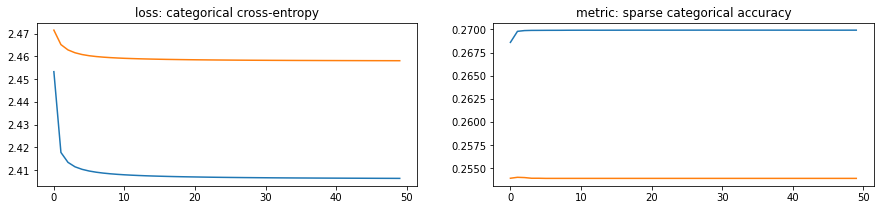

In [16]:
print_performance(model)
print_history(history)

## Define and train a simple model with embedded input

* Given a single character embedding, predict the next one

* this works faster with a .02, .01, .01, .96 split
* with .98, .01, .01, takes about 2min/epoch

In [17]:
batch_size = 128
dict_size = len(tokenizer.index_word.keys()) + 1
embedding_dim = 10
lr_0 = 1
epochs = 50

In [18]:
train = make_dataset('train', tokenizer, batch_size = batch_size)
valid = make_dataset('valid', tokenizer)
test = make_dataset('test', tokenizer)

In [19]:
model = keras.models.Sequential(name = "Softmax_Classifier_with_Embedding")

model.add(keras.layers.Embedding(input_dim = dict_size, output_dim = embedding_dim, input_length = 1, name = 'Embedding'))
model.add(keras.layers.Dense(units = dict_size, activation = 'softmax', name = 'Output',
                             bias_initializer = keras.initializers.Constant(bias_output_layer)))

model.compile(optimizer = keras.optimizers.SGD(learning_rate = lr_0), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 1, restore_best_weights = True, verbose = True)

model.summary()

Model: "Softmax_Classifier_with_Embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, 1, 10)             1160      
_________________________________________________________________
Output (Dense)               (None, 1, 116)            1276      
Total params: 2,436
Trainable params: 2,436
Non-trainable params: 0
_________________________________________________________________


In [20]:
history = model.fit(train, epochs = epochs, verbose = 0, validation_data = valid,
                   callbacks = [early_stopping_cb])

Restoring model weights from the end of the best epoch.
Epoch 00004: early stopping


Performance on train set:
52300/52300 [==============================] - 76s 1ms/step - loss: 2.5773 - sparse_categorical_accuracy: 0.2419
Performance on valid set:
4270/4270 [==============================] - 4s 923us/step - loss: 2.5466 - sparse_categorical_accuracy: 0.2427
Performance on test set:
3776/3776 [==============================] - 4s 927us/step - loss: 2.5516 - sparse_categorical_accuracy: 0.2443
Performance log:
- | Softmax_Classifier_with_Embedding | 2.577 2.547 2.552 | 24.2% 24.3% 24.4%


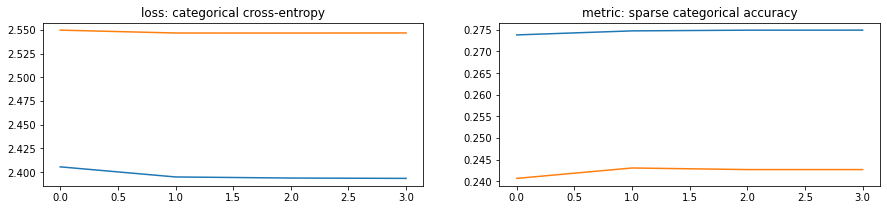

In [21]:
print_performance(model)
print_history(history)

## RNN with single recurrent unit, one-hot encoding

* Many-to-many
* 1-layer
* Simple recurrent unit & GRU & LSTM
* One-hot encoding

* Default GRU and LSTM(?) implementations use the same bias_initializer for the kernel and recurrent channels. Bias initialization with the prevalences does not work in this case. Requires accessing the right part of the bias vector ?

In [75]:
sequence_length = 32
batch_size = 128
dict_size = len(tokenizer.index_word.keys()) + 1
lr_0 = .01
epochs = 100

In [76]:
train = make_dataset('train', tokenizer, sequence_length = sequence_length, batch_size = batch_size, batching_mode = 'recurrent_encoding')
valid = make_dataset('valid', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')
test = make_dataset('test', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')

In [77]:
encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens = dict_size, name = "Encoding")
td_encoding = keras.layers.TimeDistributed(encoding, input_shape = [None, 1], name = "TD_Encoding")

simple_rnn = keras.layers.SimpleRNN(units = dict_size, return_sequences = True, activation = 'softmax', 
                                    bias_initializer = keras.initializers.Constant(bias_output_layer),
                                    name = "Recurrent")
gru = keras.layers.GRU(units = dict_size, return_sequences = True, activation = 'softmax', 
                       name = "Recurrent")
lstm = keras.layers.LSTM(units = dict_size, return_sequences = True, activation = 'softmax', 
                         name = "Recurrent")

#model = keras.models.Sequential([td_encoding, simple_rnn], name = "Simple_RNN_with_Encoding")
#model = keras.models.Sequential([td_encoding, gru], name = "GRU_with_Encoding")
model = keras.models.Sequential([td_encoding, lstm], name = "LSTM_with_Encoding")

model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_0), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True, verbose = True)
log_dir = get_tensorboard_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = log_dir)

model.summary()

Model: "LSTM_with_Encoding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TD_Encoding (TimeDistributed (None, None, 116)         0         
_________________________________________________________________
Recurrent (LSTM)             (None, None, 116)         108112    
Total params: 108,112
Trainable params: 108,112
Non-trainable params: 0
_________________________________________________________________


In [78]:

#https://keras.io/api/callbacks/terminate_on_nan/


history = model.fit(train, epochs = epochs, verbose = 0, validation_data = valid,
                   callbacks = [early_stopping_cb, tensorboard_cb])

Performance on train set:
1634/1634 [==============================] - 73s 44ms/step - loss: 2.0464 - sparse_categorical_accuracy: 0.4189 5s - loss: 2.0442 - sparse_categorical_accurac - ETA: 4s
Performance on valid set:
133/133 [==============================] - 1s 11ms/step - loss: 1.9878 - sparse_categorical_accuracy: 0.4347
Performance on test set:
117/117 [==============================] - 1s 10ms/step - loss: 2.0544 - sparse_categorical_accuracy: 0.4051
Performance log:
run__2021-03-03__12-56-16 | LSTM_with_Encoding | 2.046 1.988 2.054 | 41.9% 43.5% 40.5%


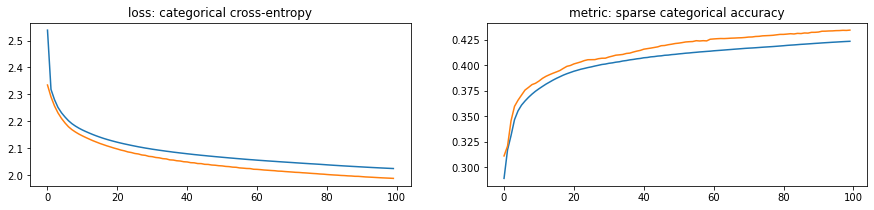

In [79]:
print_performance(model, log_dir)
print_history(history)

## RNN with single recurrent unit, embedding

In [110]:
sequence_length = 32
batch_size = 128
dict_size = len(tokenizer.index_word.keys()) + 1
embedding_dim = 20
lr_0 = .01
epochs = 100

In [111]:
train = make_dataset('train', tokenizer, sequence_length = sequence_length, batch_size = batch_size, batching_mode = 'recurrent_embedding')
valid = make_dataset('valid', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_embedding')
test = make_dataset('test', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_embedding')

In [112]:
embedding = keras.layers.Embedding(input_dim = dict_size, output_dim = embedding_dim, name = "Embedding", input_shape=[None])
recurrent = keras.layers.SimpleRNN(units = dict_size, return_sequences = True, activation = 'softmax', 
                                   bias_initializer = keras.initializers.Constant(bias_output_layer),
                                   name = "Recurrent")

simple_rnn = keras.layers.SimpleRNN(units = dict_size, return_sequences = True, activation = 'softmax', 
                                   bias_initializer = keras.initializers.Constant(bias_output_layer),
                                   name = "Recurrent")

gru = keras.layers.GRU(units = dict_size, return_sequences = True, activation = 'softmax', 
                       name = "Recurrent")

lstm = keras.layers.LSTM(units = dict_size, return_sequences = True, activation = 'softmax', 
                         name = "Recurrent")

#model = keras.models.Sequential([embedding, simple_rnn], name = "Simple_RNN_with_Embedding")
model = keras.models.Sequential([embedding, gru], name = "GRU_with_Embedding")
#model = keras.models.Sequential([embedding, lstm], name = "LSTM_with_Embedding")


model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_0), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True, verbose = True)
log_dir = get_tensorboard_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = log_dir)

model.summary()

Model: "GRU_with_Embedding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Embedding (Embedding)        (None, None, 20)          2320      
_________________________________________________________________
Recurrent (GRU)              (None, None, 116)         48024     
Total params: 50,344
Trainable params: 50,344
Non-trainable params: 0
_________________________________________________________________


In [113]:
history = model.fit(train, epochs = epochs, verbose = 0, validation_data = valid,
                   callbacks = [early_stopping_cb, tensorboard_cb])

Performance on train set:
1634/1634 [==============================] - 63s 38ms/step - loss: 2.1136 - sparse_categorical_accuracy: 0.4020
Performance on valid set:
133/133 [==============================] - 1s 10ms/step - loss: 2.0601 - sparse_categorical_accuracy: 0.4176
Performance on test set:
117/117 [==============================] - 1s 10ms/step - loss: 2.1156 - sparse_categorical_accuracy: 0.3906
Performance log:
run__2021-03-03__18-36-42 | LSTM_with_Embedding | 2.114 2.06 2.116 | 40.2% 41.8% 39.1%


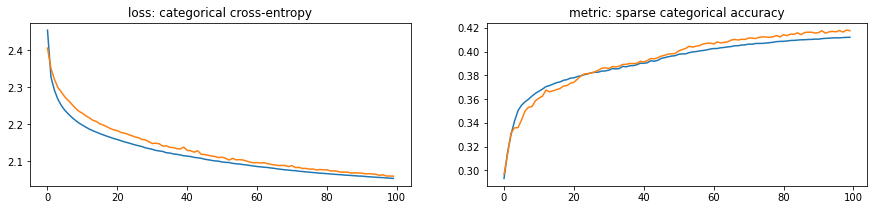

In [89]:
print_performance(model, log_dir)
print_history(history)

## Encoding -> 1-layer recurrent unit -> Dense output
* Simple RNN & GRU & LSTM
* Different number of units on recurrent layer
* Bias initialization on dense layer considering class imbalance
* Minor tweaking of learning_rate

In [152]:
sequence_length = 32
batch_size = 128
dict_size = len(tokenizer.index_word.keys()) + 1
recurrent_dim = 2 * dict_size
lr_0 = .001
epochs = 100

In [153]:
train = make_dataset('train', tokenizer, sequence_length = sequence_length, batch_size = batch_size, batching_mode = 'recurrent_encoding')
valid = make_dataset('valid', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')
test = make_dataset('test', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')

In [154]:
encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens = dict_size, name = "Encoding")
td_encoding = keras.layers.TimeDistributed(encoding, input_shape = [None, 1], name = "TD_Encoding")

simple_rnn = keras.layers.SimpleRNN(units = recurrent_dim, return_sequences = True, name = "Recurrent")
gru = keras.layers.GRU(units = recurrent_dim, return_sequences = True, name = "Recurrent")
lstm = keras.layers.LSTM(units = recurrent_dim, return_sequences = True, name = "Recurrent")

dense = keras.layers.Dense(units = dict_size, activation = 'softmax', name = "Dense",
                           bias_initializer = keras.initializers.Constant(bias_output_layer))

#model = keras.models.Sequential([td_encoding, simple_rnn, dense], name = "Simple_RNN_Dense_output_with_Encoding")
#model = keras.models.Sequential([td_encoding, gru, dense], name = "GRU_Dense_output_with_Encoding")
model = keras.models.Sequential([td_encoding, lstm, dense], name = "LSTM_Dense_output_with_Encoding")

model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_0), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, min_delta = .01, restore_best_weights = True, verbose = True)
log_dir = get_tensorboard_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = log_dir)

model.summary()

Model: "LSTM_Dense_output_with_Encoding"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TD_Encoding (TimeDistributed (None, None, 116)         0         
_________________________________________________________________
Recurrent (LSTM)             (None, None, 232)         323872    
_________________________________________________________________
Dense (Dense)                (None, None, 116)         27028     
Total params: 350,900
Trainable params: 350,900
Non-trainable params: 0
_________________________________________________________________


In [155]:
history = model.fit(train, epochs = epochs, verbose = 0, validation_data = valid,
                    callbacks = [early_stopping_cb, tensorboard_cb])

Restoring model weights from the end of the best epoch.
Epoch 00021: early stopping


Performance on train set:
1634/1634 [==============================] - 161s 97ms/step - loss: 1.0680 - sparse_categorical_accuracy: 0.6744
Performance on valid set:
133/133 [==============================] - 3s 20ms/step - loss: 1.0350 - sparse_categorical_accuracy: 0.6822: 2s - loss: 1.0289 -
Performance on test set:
117/117 [==============================] - 2s 20ms/step - loss: 1.1011 - sparse_categorical_accuracy: 0.6649
Performance log:
run__2021-03-04__18-47-08 | LSTM_Dense_output_with_Encoding | 350900 | 1.068 1.035 1.101 | 67.4% 68.2% 66.5%


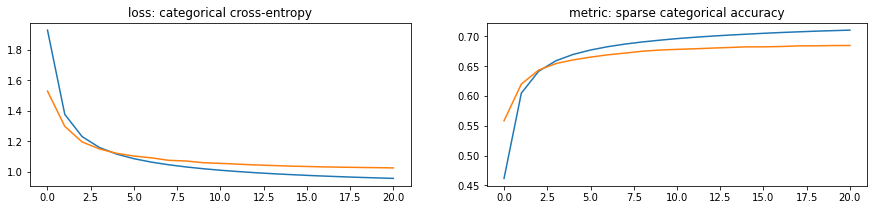

In [156]:
print_performance(model, log_dir)
print_history(history)

## One-hot encoding, stack of many recurrent layers, dense output
* Many-to-many
* 3 layers
* Simple recurrent unit & GRU & LSTM
* Dense output with bias initialization observing class proportions
* One-hot encoding
* **Tests with increased sequence length**
* **Tests with increased number of units**

In [169]:
sequence_length = 32
batch_size = 128
dict_size = len(tokenizer.index_word.keys()) + 1
recurrent_dim = 2 * dict_size
recurrent_stack_size = 3
type_of_recurrent_unit = "lstm" # "simple_rnn", "gru", "lstm"
model_name = "LSTM_stack_encoding_dense"
lr_0 = .001
epochs = 100

In [170]:
train = make_dataset('train', tokenizer, sequence_length = sequence_length, batch_size = batch_size, batching_mode = 'recurrent_encoding')
valid = make_dataset('valid', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')
test = make_dataset('test', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')

In [171]:
model = keras.models.Sequential(name = model_name)

encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens = dict_size, name = "Encoding")
td_encoding = keras.layers.TimeDistributed(encoding, input_shape = [None, 1], name = "TD_Encoding")

model.add(td_encoding)

for unit in range(recurrent_stack_size):
    if type_of_recurrent_unit == "simple_rnn":    
        model.add(keras.layers.SimpleRNN(units = recurrent_dim, return_sequences = True, name = "Recurrent_"+str(unit)))
    elif type_of_recurrent_unit == "gru":
        model.add(keras.layers.GRU(units = recurrent_dim, return_sequences = True, name = "Recurrent_"+str(unit)))
    elif type_of_recurrent_unit == "lstm":
        model.add(keras.layers.LSTM(units = recurrent_dim, return_sequences = True, name = "Recurrent_"+str(unit)))

dense = keras.layers.Dense(units = dict_size, activation = 'softmax', name = "Dense",
                           bias_initializer = keras.initializers.Constant(bias_output_layer))              
              
model.add(dense)

model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_0), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 5, min_delta = .01, restore_best_weights = True, verbose = True)
log_dir = get_tensorboard_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = log_dir)

model.summary()

Model: "LSTM_stack_encoding_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TD_Encoding (TimeDistributed (None, None, 116)         0         
_________________________________________________________________
Recurrent_0 (LSTM)           (None, None, 232)         323872    
_________________________________________________________________
Recurrent_1 (LSTM)           (None, None, 232)         431520    
_________________________________________________________________
Recurrent_2 (LSTM)           (None, None, 232)         431520    
_________________________________________________________________
Dense (Dense)                (None, None, 116)         27028     
Total params: 1,213,940
Trainable params: 1,213,940
Non-trainable params: 0
_________________________________________________________________


In [172]:
history = model.fit(train, epochs = epochs, verbose = 0, validation_data = valid,
                    callbacks = [early_stopping_cb, tensorboard_cb])

Restoring model weights from the end of the best epoch.
Epoch 00016: early stopping


Performance on train set:
1634/1634 [==============================] - 512s 312ms/step - loss: 1.0596 - sparse_categorical_accuracy: 0.6738
Performance on valid set:
133/133 [==============================] - 9s 71ms/step - loss: 1.0298 - sparse_categorical_accuracy: 0.6811
Performance on test set:
117/117 [==============================] - 8s 71ms/step - loss: 1.0936 - sparse_categorical_accuracy: 0.6640
Performance log:
run__2021-03-05__18-58-16 | LSTM_stack_encoding_dense | 1213940 | 1.06 1.03 1.094 | 67.4% 68.1% 66.4%


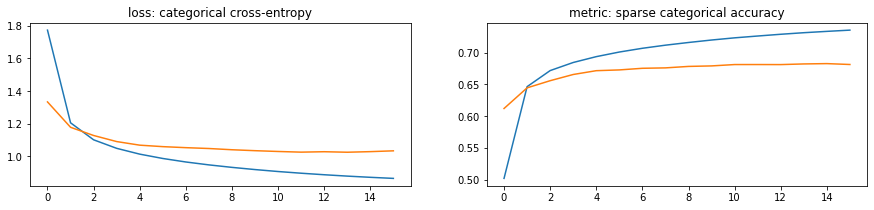

In [173]:
print_performance(model, log_dir)
print_history(history)

## One-hot encoding, stack of many recurrent layers, layer normalization, dense output

In [13]:
sequence_length = 128
batch_size = 32
dict_size = len(tokenizer.index_word.keys()) + 1
recurrent_dim = 4 * dict_size
recurrent_stack_size = 3
type_of_recurrent_unit = "gru" # "simple_rnn", "gru", "lstm"
model_name = "GRU_LN_encoding_dense"
lr_0 = .001
epochs = 100
clip_norm = 1

In [14]:
train = make_dataset('train', tokenizer, sequence_length = sequence_length, batch_size = batch_size, batching_mode = 'recurrent_encoding')
valid = make_dataset('valid', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')
test = make_dataset('test', tokenizer, sequence_length = sequence_length, batching_mode = 'recurrent_encoding')

In [15]:
model = keras.models.Sequential(name = model_name)

encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens = dict_size, name = "Encoding")
td_encoding = keras.layers.TimeDistributed(encoding, input_shape = [None, 1], name = "TD_Encoding")

model.add(td_encoding)

for unit in range(recurrent_stack_size):
    if type_of_recurrent_unit == "simple_rnn":    
        # NOT YET IMPLEMENTED WITH LN
        model.add(keras.layers.SimpleRNN(units = recurrent_dim, return_sequences = True, name = "Recurrent_"+str(unit)))
    elif type_of_recurrent_unit == "gru":
        model.add(keras.layers.RNN(LN_GRU_Cell(units = recurrent_dim), return_sequences = True, name = "Recurrent_"+str(unit)))
    elif type_of_recurrent_unit == "lstm":
        model.add(keras.layers.RNN(LN_LSTM_Cell(units = recurrent_dim), return_sequences = True, name = "Recurrent_"+str(unit)))

dense = keras.layers.Dense(units = dict_size, activation = 'softmax', name = "Dense",
                           bias_initializer = keras.initializers.Constant(bias_output_layer))              
              
model.add(dense)

model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_0, clipnorm = clip_norm), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, min_delta = .01, restore_best_weights = True, verbose = True)
log_dir = get_tensorboard_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = log_dir)

model.summary()

Model: "GRU_LN_encoding_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TD_Encoding (TimeDistributed (None, None, 116)         0         
_________________________________________________________________
Recurrent_0 (RNN)            (None, None, 464)         811072    
_________________________________________________________________
Recurrent_1 (RNN)            (None, None, 464)         1295488   
_________________________________________________________________
Recurrent_2 (RNN)            (None, None, 464)         1295488   
_________________________________________________________________
Dense (Dense)                (None, None, 116)         53940     
Total params: 3,455,988
Trainable params: 3,455,988
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(train, epochs = epochs, verbose = 1, validation_data = valid,
                    callbacks = [early_stopping_cb, tensorboard_cb])

Restoring model weights from the end of the best epoch.
Epoch 00006: early stopping


Performance on train set:
1634/1634 [==============================] - 3223s 2s/step - loss: 1.0593 - sparse_categorical_accuracy: 0.6779
Performance on valid set:
33/33 [==============================] - 26s 783ms/step - loss: 1.0143 - sparse_categorical_accuracy: 0.6888
Performance on test set:
29/29 [==============================] - 24s 815ms/step - loss: 1.0856 - sparse_categorical_accuracy: 0.6672
Performance log:
run__2021-03-11__19-14-45 | GRU_LN_encoding_dense | 3455988 | 1.059 1.014 1.086 | 67.8% 68.9% 66.7%


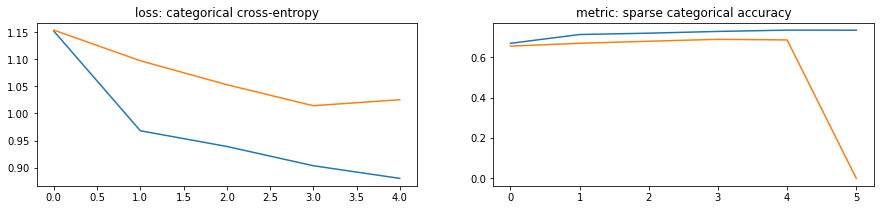

In [17]:
print_performance(model, log_dir)
print_history(history)

# Stateful RNN, one-hot encoding, layer normalization

In [45]:
sequence_length = 32
batch_size = 32
dict_size = len(tokenizer.index_word.keys()) + 1
recurrent_dim = 4 * dict_size
recurrent_stack_size = 3
type_of_recurrent_unit = "gru" # "simple_rnn", "gru", "lstm"
model_name = "Stateful_GRU_LN_encoding_dense"
lr_0 = .001
epochs = 100
clip_norm = 1

In [46]:
train = make_dataset('train', tokenizer, sequence_length = sequence_length, batch_size = batch_size, batching_mode = 'stateful_encoding')
valid = make_dataset('valid', tokenizer, sequence_length = sequence_length, batching_mode = 'stateful_encoding')
test = make_dataset('test', tokenizer, sequence_length = sequence_length, batching_mode = 'stateful_encoding')

In [47]:
model = keras.models.Sequential(name = model_name)

encoding = keras.layers.experimental.preprocessing.CategoryEncoding(max_tokens = dict_size, name = "Encoding")
td_encoding = keras.layers.TimeDistributed(encoding, input_shape = [None, 1], name = "TD_Encoding")

model.add(td_encoding)

for unit in range(recurrent_stack_size):
    if type_of_recurrent_unit == "simple_rnn":    
        # NOT YET IMPLEMENTED WITH LN
        model.add(keras.layers.SimpleRNN(units = recurrent_dim, return_sequences = True, name = "Recurrent_"+str(unit)))
    elif type_of_recurrent_unit == "gru":
        model.add(keras.layers.RNN(LN_GRU_Cell(units = recurrent_dim), return_sequences = True, name = "Recurrent_"+str(unit)))
    elif type_of_recurrent_unit == "lstm":
        model.add(keras.layers.RNN(LN_LSTM_Cell(units = recurrent_dim), return_sequences = True, name = "Recurrent_"+str(unit)))

dense = keras.layers.Dense(units = dict_size, activation = 'softmax', name = "Dense",
                           bias_initializer = keras.initializers.Constant(bias_output_layer))              
              
model.add(dense)

model.compile(optimizer = keras.optimizers.Adam(learning_rate = lr_0, clipnorm = clip_norm), 
              loss = 'sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy'])

early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, min_delta = .01, restore_best_weights = True, verbose = True)
terminate_on_nan_cb = keras.callbacks.TerminateOnNaN()
log_dir = get_tensorboard_logdir()
tensorboard_cb = keras.callbacks.TensorBoard(log_dir = log_dir)

model.summary()

Model: "Stateful_GRU_LN_encoding_dense"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
TD_Encoding (TimeDistributed (None, None, 116)         0         
_________________________________________________________________
Recurrent_0 (RNN)            (None, None, 464)         811072    
_________________________________________________________________
Recurrent_1 (RNN)            (None, None, 464)         1295488   
_________________________________________________________________
Recurrent_2 (RNN)            (None, None, 464)         1295488   
_________________________________________________________________
Dense (Dense)                (None, None, 116)         53940     
Total params: 3,455,988
Trainable params: 3,455,988
Non-trainable params: 0
_________________________________________________________________


In [48]:
history = model.fit(train, epochs = epochs, verbose = 1, validation_data = valid,
                    callbacks = [early_stopping_cb, tensorboard_cb, terminate_on_nan_cb])

Epoch 1/100
      1/Unknown - 0s 0s/step - loss: 3.7741 - sparse_categorical_accuracy: 0.0557WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
6537/6537 [==============================] - 6898s 1s/step - loss: 1.1121 - sparse_categorical_accuracy: 0.6687 - val_loss: 1.0495 - val_sparse_categorical_accuracy: 0.6790
Epoch 2/100
6537/6537 [==============================] - 6547s 1s/step - loss: 1.0120 - sparse_categorical_accuracy: 0.6927 - val_loss: 0.9968 - val_sparse_categorical_accuracy: 0.6914
Epoch 3/100
6537/6537 [==============================] - 6639s 1s/step - loss: 0.9778 - sparse_categorical_accuracy: 0.7015 - val_loss: 0.9741 - val_sparse_categorical_accuracy: 0.6990
Epoch 4/100
6537/6537 [==============================] - 6398s 979ms/step - loss: 

Performance on train set:
6537/6537 [==============================] - 2215s 339ms/step - loss: 1.0237 - sparse_categorical_accuracy: 0.6862
Performance on valid set:
124/124 [==============================] - 11s 90ms/step - loss: 0.9741 - sparse_categorical_accuracy: 0.6990
Performance on test set:
117/117 [==============================] - 10s 90ms/step - loss: 1.0342 - sparse_categorical_accuracy: 0.6802
Performance log:
run__2021-03-18__17-28-56 | Stateful_GRU_LN_encoding_dense | 3455988 | 1.024 0.974 1.034 | 68.6% 69.9% 68.0%


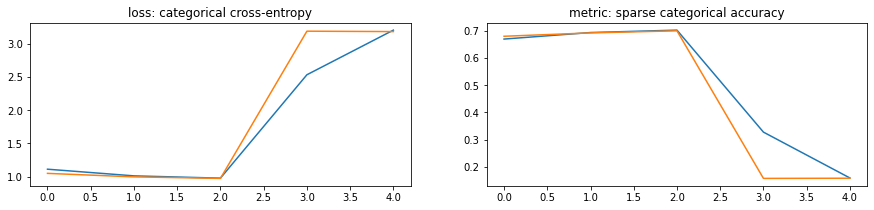

In [49]:
print_performance(model, log_dir)
print_history(history)

## Text generator

In [316]:
def convert_to_inference_model(original_model, custom_objects=None):
    original_model_json = original_model.to_json()
    inference_model_dict = json.loads(original_model_json)

    layers = inference_model_dict['config']['layers']
    for layer in layers:
        if 'stateful' in layer['config']:
            layer['config']['stateful'] = True

        if 'batch_input_shape' in layer['config']:
            layer['config']['batch_input_shape'][0] = 1
            layer['config']['batch_input_shape'][1] = None

    inference_model = keras.models.model_from_json(json.dumps(inference_model_dict), custom_objects = custom_objects)
    inference_model.set_weights(original_model.get_weights())

    return inference_model

In [317]:
#inference_model = convert_to_inference_model(model)
inference_model = convert_to_inference_model(model, custom_objects = {'LN_GRU_Cell':LN_GRU_Cell})

In [318]:
text = ''
sequence = [0]

text = '§'
sequence = tokenizer.texts_to_sequences([text])

for _ in range(1000):
    probs = inference_model.predict(np.array(sequence[0][-1]).reshape(1,-1,1))
    token = np.random.choice(np.arange(dict_size), p = probs[0,-1,:])
    sequence[0].append(token)

text = tokenizer.sequences_to_texts(sequence)    
text

['§   1 8 5 . 5   2   s h a l l   c o m p l y   w i t h   t h e   F u n w a y   1 s   r e q u i r e d   u n d e r   p a r t   5 6   p e r t i c i p a t i o n   f r o m   t h e   F A A . \n h e s e l i g \n I 5 5   d e s i g n a t i o n   c o n t r o l l e d   u n d e r   s a f e l y   p r o f e d   a s   t h e   o r g o r i n g   o f   t h e   U n i t c h a l   o f   O E E . \n c O t e s t   o f   F l i g h t   T i m e n s i t y   m e t e r   r e a   o f   t h e   u n i n f o r m a t i o n   o n   D i s c a t i o n s   − 2 9 7 1 2   =   4 3   +   I 3 1   +   I 3 7   +   D o c u m e n t a t i v e   e d g e n   i n   s c r e p h i n g   t h e   i n f o r m a t i o n   u n d e r   t h a t   c a l e n g a l   d o r y   t h e s e   s a t i s f y i n g   t h e   p r o c e d u r e .   W h e r e   a   r e p r e s e n t a t i v g   u n i t   i s   e s s u e d   p e r t i c e s ,   p r o b u p a t u t ,   o r   a v a i l a b l e   a n d   t h e   m a i n   a p p l y i w i t h o u t   t h e   u s

# Test the dataset for stateful RNN

In [21]:
sequence_length = 48
batch_size = 4

In [22]:
train = make_dataset('train', tokenizer, sequence_length = sequence_length, batch_size = batch_size, batching_mode = 'stateful_encoding')
valid = make_dataset('valid', tokenizer, sequence_length = sequence_length, batching_mode = 'stateful_encoding')
test = make_dataset('test', tokenizer, sequence_length = sequence_length, batching_mode = 'stateful_encoding')

In [23]:
for item in train.take(6):
    for sequence in range(len(item[0].numpy())):
        print(tokenizer.sequences_to_texts([item[0].numpy()[sequence]]))
    print()

['§   1 . 1       G e n e r a l   d e f i n i t i o n s . L i n k   t o   a n   a m e n d m e n t']
['a   s a f e   c l i m b o u t   c a n   b e   m a d e   a t   s p e e d s   a l l o w i n g   c']
['p r o v e d   a v i a t i o n   r e d   o r   a v i a t i o n   w h i t e   a n t i c o l l i s']
['h i c h   t h e r e   a r e   n o   d i f f e r e n c e s   i n   t h e   t y p e   d e s i g n']

['  p u b l i s h e d   a t   8 6   F R   4 5 0 3 ,   J a n .   1 5 ,   2 0 2 1 . A s   u s e d  ']
['o m p l i a n c e   w i t h   t h e   c l i m b   r e q u i r e m e n t s   o f   §   2 9 . 6 7']
['i o n   l i g h t   s y s t e m .   I n   t h e   e v e n t   o f   f a i l u r e   o f   a n y']
['  w i t h   r e s p e c t   t o   t h e   i n s t a l l a t i o n   o f   t h e   f i r s t   p']

['i n   S u b c h a p t e r s   A   t h r o u g h   K   o f   t h i s   c h a p t e r ,   u n l e']
['( a ) ( 1 )   a n d   ( 2 ) ;   a n d \n ( c )   T h e   r o t o r c r a f t   d o e s   n o t  

In [272]:
text = ''
sequence = [0]

text = '§'
sequence = tokenizer.texts_to_sequences([text])

for _ in range(100):
    probs = model.predict(np.array(sequence).reshape(1,-1,1))
    #token = np.argmax(probs[0,-1,:])
    token = np.random.choice(np.arange(dict_size), p = probs[0,-1,:])
    sequence[0].append(token)

text = tokenizer.sequences_to_texts(sequence)    
text

['§   1 7 6 . 1 0       D e s i g n a t i o n . \n ( c )   T h e   s w i t c h i n g   o f   t h o s e   r e q u i r e m e n t s . ( a )   F o r   r e c e i v e s   $ ± g   d e a t . \n 3 ° . ,   W r a s s']

In [268]:
np.random.choice(np.arange(dict_size), p = probs[0,-1,:])

16

In [259]:
probs[0,-1,:].shape

(116,)

In [251]:
tokenizer.index_word

{1: ' ',
 2: 'e',
 3: 't',
 4: 'a',
 5: 'i',
 6: 'r',
 7: 'n',
 8: 'o',
 9: 's',
 10: 'c',
 11: 'h',
 12: 'd',
 13: 'l',
 14: 'p',
 15: 'f',
 16: 'u',
 17: 'm',
 18: 'g',
 19: ',',
 20: 'y',
 21: 'b',
 22: '.',
 23: '1',
 24: '\n',
 25: '(',
 26: ')',
 27: 'w',
 28: 'v',
 29: '2',
 30: '0',
 31: 'A',
 32: '3',
 33: '5',
 34: '9',
 35: 'F',
 36: '4',
 37: '-',
 38: '6',
 39: '7',
 40: 'q',
 41: 'T',
 42: ';',
 43: 'x',
 44: 'k',
 45: '8',
 46: 'R',
 47: 'S',
 48: '§',
 49: 'C',
 50: 'D',
 51: 'I',
 52: 'E',
 53: 'N',
 54: 'M',
 55: 'z',
 56: 'P',
 57: 'O',
 58: ':',
 59: 'j',
 60: 'U',
 61: '[',
 62: ']',
 63: 'B',
 64: 'W',
 65: "'",
 66: 'L',
 67: 'H',
 68: 'J',
 69: 'V',
 70: '°',
 71: '/',
 72: 'G',
 73: '′',
 74: '”',
 75: '“',
 76: '″',
 77: 'Y',
 78: '+',
 79: 'K',
 80: 'X',
 81: 'Q',
 82: '=',
 83: 'Z',
 84: '−',
 85: '*',
 86: '±',
 87: '$',
 88: '?',
 89: '_',
 90: '%',
 91: '≤',
 92: '<',
 93: 'θ',
 94: 'δ',
 95: 'σ',
 96: 'β',
 97: '&',
 98: 'ρ',
 99: '>',
 100: 'ω',
 101: '

### Generate new text

# Trash

In [35]:
#full_text = ''

#for paragraph in tokenizer.sequences_to_texts(seq):
#    full_text += paragraph

#[full_text = full_text + paragraph for paragraph in tokenizer.sequences_to_texts(seq)]
#full_text

In [36]:
# removing spaces between characters

#full_text_no_spaces = ''

#for i in np.arange(1,len(full_text)/2, dtype='int')*2-1:
#    full_text_no_spaces += full_text[i]

#full_text_no_spaces

In [37]:
#tokenizer.word_counts # count each symbol in order of appearance
#tokenizer.word_docs # count each symbol
#tokenizer.word_index # symbol to number dictionary

In [38]:
# 'texts_to_matrix',
# 'texts_to_sequences',
# 'texts_to_sequences_generator',

#tokenizer.texts_to_matrix('ξ') # one-hot encoding of string according to .word_index()
#tokenizer.texts_to_sequences(['assdafas', 'asdf']) # list of lists containing number corresponding to each symbol
#for item in tokenizer.texts_to_sequences_generator(['assdafas', 'asdf', '|', 'ª', 'º']): # same as previous, as generator
#    print('this is one item: ' + str(item))

In [39]:
#tokenizer.sequences_to_texts(tokenizer.texts_to_sequences_generator(['assdafas', 'asdf', '|', 'ª', 'º']))
#tokenizer.sequences_to_texts(tokenizer.texts_to_sequences(['assdafas', 'asdf', '|', 'ª', 'º']))
#tokenizer.sequences_to_texts([[5, 6, 8, 1, 9], [78, 40, 31]]) # receive list of lists of tokens, returns strings of symbols

#tokenizer.sequences_to_matrix([[1, 2, 3, 10, 115]]) # for each list, return one-hot encoding of all symbols in sequence

In [40]:
#with open(join('dataset','ECFR-title14.txt'), 'w', encoding='utf-8') as file:
#    for element in root.iter():
#        if element.tag == 'DIV8':
#            [file.write(line) for line in element.itertext() if line[0] != '\n']
#            file.write('\n\n\n')

In [41]:


#with open(join('dataset','ECFR-title14.txt'), 'w', encoding='utf-8') as file:
#    for element in root.iter():
#        if element.tag == 'DIV1':
#            if element.attrib['N'] == '4':
#                break
                
#        if element.tag == 'DIV8':
#            [file.write(line) for line in element.itertext() if line[0] != '\n']
#            file.write('\n')
                
                
        #[file.write(line) for line in element.itertext() if line[0] != '\n'] # THIS IS RECURSIVE AND DOES NOT WORK

In [42]:
#full_corpus = open(join('dataset','ECFR-title14.txt'), 'r', encoding='utf')

#train = open(join('dataset','ECFR-title14-train.txt'), 'w', encoding='utf-8')
#valid = open(join('dataset','ECFR-title14-valid.txt'), 'w', encoding='utf-8')
#test = open(join('dataset','ECFR-title14-test.txt'), 'w', encoding='utf-8')
#trash = open(join('dataset', 'trash.txt'), 'w', encoding='utf-8')

#partitions = np.array(['train', 'valid', 'test', 'trash'])
#current_partition = partitions[0]
#split_proportions = np.array([.98, .01, .01, 0]) # train, valid, test, trash

#for line in full_corpus:
#    if line[0] == '§':
#        trash.write(line + '\n')
#        current_partition = np.random.choice(partitions, p=split_proportions)
#    if current_partition == 'train':
#        train.write(line)
#    elif current_partition == 'valid':
#        valid.write(line)
#    elif current_partition == 'test':
#        test.write(line)



In [43]:
#full_corpus.close()
#train.close()
#valid.close()
#test.close()
#trash.close()

In [44]:
#os.listdir()
#'temp' in os.listdir()

In [45]:
# alternative way to calculate the bias for the last layer - based on each token's prevalence

# make a tokenizer based only on train set
#tokenizer = keras.preprocessing.text.Tokenizer(char_level = True, lower = False, filters = '')
#file = open(join('dataset', 'ECFR-title14-train.txt'), encoding = 'utf-8')
#tokenizer.fit_on_texts(file)
#file.close()

# calculate bias terms for last layer according to token prevalence
#tokens = list(tokenizer.word_index)
#frequency = np.array([1e-12] + [tokenizer.word_counts[k] for k in tokens])
#frequency = frequency / frequency.sum()
#bias = (lambda y : np.array([-np.log(1/y - 1) for y in y]))(frequency)

# this only makes sense in the dummy test is the bias is calculated from the prevalence
#trained_bias = model.layers[1](np.zeros((1,dict_size))).numpy().flatten()
#plt.plot(bias, trained_bias, 'bo')
#plt.yscale('log')